##**LATAR BELAKANG**

Transportasi publik memegang peran penting dalam mobilitas masyarakat perkotaan, terutama di kota besar seperti Jakarta. Transjakarta, sebagai sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara, berupaya menyediakan layanan transportasi yang efisien, terjangkau, dan ramah lingkungan. Namun, seiring meningkatnya jumlah pengguna setiap tahunnya, diperlukan analisis yang mendalam terhadap pola perjalanan penumpang untuk meningkatkan efisiensi dan kualitas layanan.

---
Transportasi publik yang efisien dan terjangkau menjadi kebutuhan utama bagi masyarakat perkotaan, terutama di kota besar seperti Jakarta. Transjakarta, sebagai penyedia layanan Bus Rapid Transit (BRT), terus berinovasi untuk meningkatkan kenyamanan dan aksesibilitas bagi pengguna. Salah satu tantangan utama dalam penggunaan transportasi publik adalah pemilihan rute yang optimal serta biaya perjalanan yang efisien sesuai dengan pola perjalanan pengguna.

Saat ini, sistem pembayaran Transjakarta berbasis tarif tetap per perjalanan tanpa mempertimbangkan pola penggunaan individu, yang dapat menyebabkan pengeluaran yang kurang optimal bagi pengguna yang sering bepergian. Dengan menganalisis data perjalanan berdasarkan frekuensi dan pola penggunaan kartu pembayaran, sistem rekomendasi dapat membantu penumpang memilih paket langganan yang paling sesuai dengan kebutuhan mereka, seperti paket harian, mingguan, atau bulanan.

Selain itu, dalam perjalanan sehari-hari, pengguna sering menghadapi kendala seperti kemacetan dan waktu tempuh yang tidak menentu. Dengan menganalisis data tap-in dan tap-out, kita dapat memperkirakan durasi perjalanan rata-rata per koridor dan merekomendasikan rute tercepat berdasarkan waktu dan hari. Dengan menerapkan teknik machine learning seperti regresi atau clustering, sistem rekomendasi dapat memberikan saran perjalanan yang lebih akurat, memungkinkan pengguna untuk menghindari kepadatan dan memilih rute yang lebih efisien.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##**RUMUSAN MASALAH**
Dalam sistem transportasi publik seperti Transjakarta, efisiensi perjalanan dan biaya transportasi merupakan dua aspek utama yang memengaruhi pengalaman pengguna. Namun, terdapat beberapa permasalahan yang masih dihadapi oleh penumpang dalam memanfaatkan layanan ini secara optimal:

1.  Ketidakpastian dalam Pemilihan Rute Tercepat


 *    Pengguna sering mengalami kendala dalam memilih rute tercepat karena variasi waktu tempuh yang dipengaruhi oleh kepadatan lalu lintas, jumlah penumpang, dan kondisi operasional Transjakarta.
 *   Tidak adanya sistem rekomendasi yang memberikan saran rute berdasarkan data historis membuat pengguna kesulitan dalam menghindari jalur yang padat dan meminimalkan waktu perjalanan.

2. Kurangnya Sistem Rekomendasi Paket Langganan yang Sesuai


*    Saat ini, tarif Transjakarta berbasis pembayaran per perjalanan tanpa mempertimbangkan pola perjalanan individu.
*   Pengguna yang sering bepergian mungkin mengeluarkan biaya lebih besar dibandingkan jika ada sistem rekomendasi paket langganan yang lebih hemat, seperti paket harian, mingguan, atau bulanan.

*   Tidak adanya sistem yang menganalisis pola perjalanan individu untuk memberikan rekomendasi paket langganan optimal menyebabkan pengguna membayar lebih dari yang seharusnya.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import missingno as msn
import folium

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Transjakarta.csv")
df.tail()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


### PENJELASAN SETIAP COLOM DARI DATA TRANSJAKARTA
transID : ID unik untuk setiap transaksi perjalanan.

payCardID : Nomor kartu pembayaran yang digunakan.

payCardBank : Bank penerbit kartu pembayaran.

payCardName : Nama pemegang kartu pembayaran.

payCardSex : Jenis kelamin pemegang kartu pembayaran (M/F).

payCardBirthDate : Tahun kelahiran pemegang kartu pembayaran.

corridorID : ID unik untuk koridor Transjakarta yang digunakan.

corridorName : Nama koridor atau rute yang digunakan.

direction : Arah perjalanan (0 atau 1).

tapInStops : ID halte tempat penumpang tap-in.

tapInStopsName : Nama halte tempat penumpang tap-in.

tapInStopsLat : Koordinat latitude halte tap-in.

tapInStopsLon : Koordinat longitude halte tap-in.

stopStartSeq : Urutan halte awal di rute perjalanan.

tapInTime : Waktu ketika penumpang melakukan tap-in.

tapOutStops : ID halte tempat penumpang tap-out.

tapOutStopsName : Nama halte tempat penumpang tap-out.

tapOutStopsLat : Koordinat latitude halte tap-out.

tapOutStopsLon : Koordinat longitude halte tap-out.

stopEndSeq : Urutan halte akhir di rute perjalanan.

tapOutTime : Waktu ketika penumpang melakukan tap-out.

payAmount : Jumlah tarif yang dibayarkan untuk perjalanan.

## DARA UNDERSTANDING
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita

In [ ]:
print("Jumlah Baris dan Kolom dari data Transjakarta :", df.shape)

Jumlah Baris dan Kolom dari data Transjakarta : (37900, 22)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [ ]:
df = df.drop(columns=['payCardID'])

In [ ]:
display(df.describe(), df.describe(include='object'))

,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,FMZZ963S4B68ZP,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-17 18:14:19
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [ ]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
2,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana, S.H., Tgk. Ilsa Farida, Drs. Nadia Ramadan, S.Sos, drg. Lukman Hidayanto, Ibrahim Prayoga, S.H., Ega Andriani, Salman Ramadan, Zizi Nasyiah, Tgk. Aris Pradipta, M.M., Margana Narpati, Galang Megantara, S.Ked, Rahayu Rahayu, Dr. Zulfa Tamba, S.E.I, drg. Lukita Rajata, R. Mila Wahyuni, S.Sos, Artawan Iswahyudi, M.Pd, Aurora Hasanah, Hj. Rahmi Hartati, Darmaji Wahyuni, Cager Setiawan, Cawuk Mayasari, Asman Uyainah, Zulaikha Yulianti, Oliva Sirait, dr. Belinda Handayani, S.E., Laila Simanjuntak, Pranata Wahyudin, Puti Paris Marpaung, Sutan Narji Nasyidah, Tirtayasa Sitorus, Galak Prayoga, S.Pd, Tgk. Garda Utami, Elvina Situmorang, S.Psi, Lutfan Hakim, Restu Waluyo, Gara Sitompul, Daryani Prabowo, Gangsa Widodo, Yance Pratama, S.Kom, dr. Sakura Budiman, S.IP, Zalindra Irawan, M.TI., Jamal Pudjiastuti, S.I.Kom, Suci Wacana, Mustofa Wijayanti, M.Farm, Saka Sihombing, Mutia Mayasari, Danu Suartini, S.Farm, Harsaya Natsir, Drs. Harjo Nurdiyanti, Dt. Atmaja Suartini, M.Farm, Dewi Mansur, Tina Hutasoit, Tgk. Tania Zulaika, M.Pd, Latika Sirait, Lasmanto Budiman, Zamira Puspita, T. Bagas Halimah, Dr. Intan Mulyani, S.E.I, Vero Hutagalung, Diah Marpaung, Drs. Gilda Sinaga, S.Psi, Bahuwirya Rahayu, Samsul Ramadan, Bancar Irawan, Jati Nainggolan, M.TI., Puspa Saptono, Dr. Zaenab Wulandari, S.Ked, T. Karna Sihombing, Kalim Namaga, dr. Vega Rahimah, S.Pt, Bajragin Najmudin, Ophelia Firmansyah, Sutan Garda Tampubolon, S.Pd, ...]"
3,payCardSex,2,"[M, F]"
4,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 1991, 2004, 1984, 1988, 2002, 1975, 2011, 2003, 1981, 2009, 1983, 1999, 2007, 1979, 1960, 1995, 2001, 1990, 1968, 1985, 2010, 1989, 2006, 1986, 1965, 2005, 1966, 1994, 1972, 1969, 1970, 2000, 1953, 1977, 2012, 1987,

array([[<Axes: title={'center': 'payCardBirthDate'}>,
        <Axes: title={'center': 'direction'}>,
        <Axes: title={'center': 'tapInStopsLat'}>],
       [<Axes: title={'center': 'tapInStopsLon'}>,
        <Axes: title={'center': 'stopStartSeq'}>,
        <Axes: title={'center': 'tapOutStopsLat'}>],
       [<Axes: title={'center': 'tapOutStopsLon'}>,
        <Axes: title={'center': 'stopEndSeq'}>,
        <Axes: title={'center': 'payAmount'}>]], dtype=object)

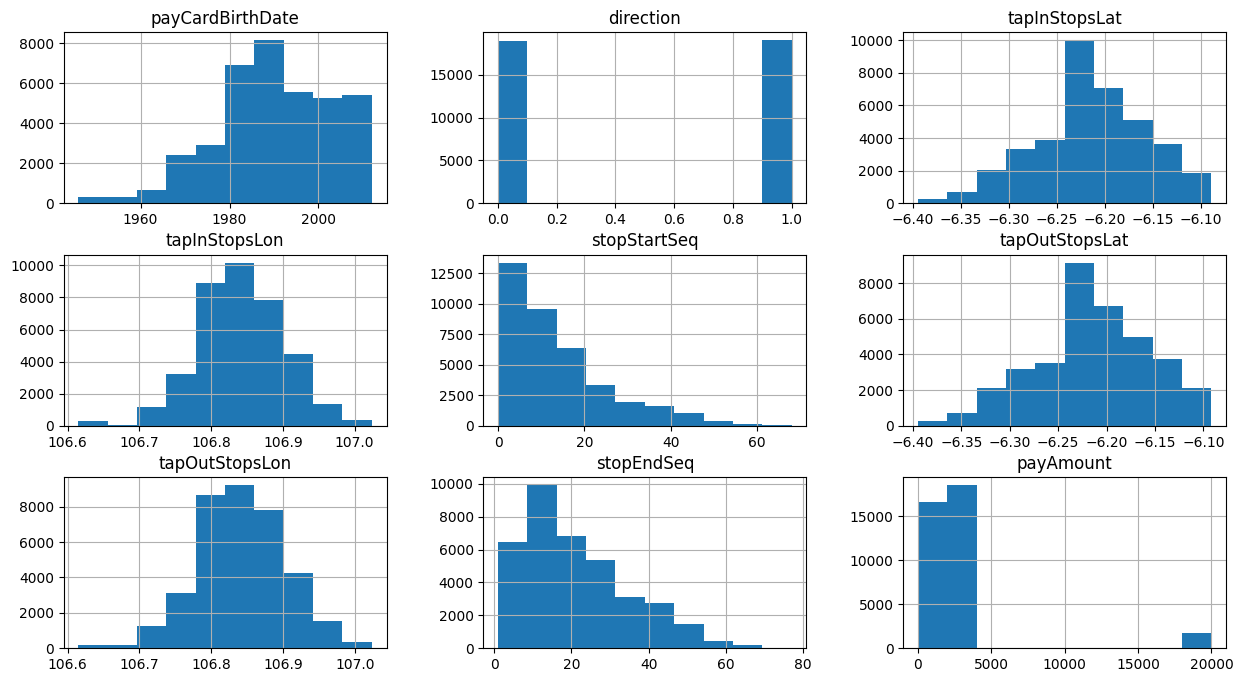

In [ ]:
df.hist(figsize=(15,8))

Secara umum, dari data Transjakarta kita dapat mengetahui :
* dataset Transjakarta  memiliki 22 kolom dan 37900 baris.
* pada fungsi [info ()] kita dapat mengetahui dari setiap kolom yang kita miliki mempunyai type data apa saja.
* pada kolom (PayCardsex) kita dapat melihat bahwa tidak memiliki data yang hilang dan mempunyai 2 unique value dan menunjukan bahwa pengguna Bus lebih didominasi oleh perempuan dan jumlahnya sebesar (20157	pengguna perempuan)
* data Transjakarta pada kolom (payCardID) tidak diperlukan karena tidak diperlukan pada analisis jadi dihapus saja
* kolom tapINtime dan tapOuttime akan dikelompokkan menjadi hanya hitungan jam saja agar memudahkan dalam menganalisa.
* semua kolom di datasheet Transjakarta dilakukan visual menggunakan histogram agar memudahkan dalam menganalisa data tersebut.

## DATA DUPLIKAT ##

In [ ]:
df_duplicated = df.duplicated().sum()
print(f'Jumlah data duplikat sebanyak {df_duplicated}')

Jumlah data duplikat sebanyak 0


Setelah dilakukan pengecekan data maka dari datasheet Transjakarta tidak ada data yang duplikat

## DATA MISSING VALUE

Presentase Mising value pada data sheetTransjakarta

In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
transID,0.000000
payCardBank,0.000000
payCardName,0.000000
payCardSex,0.000000
payCardBirthDate,0.000000
corridorID,3.316623
corridorName,5.092348
direction,0.000000
tapInStops,3.200528
tapInStopsName,0.000000


<Axes: >

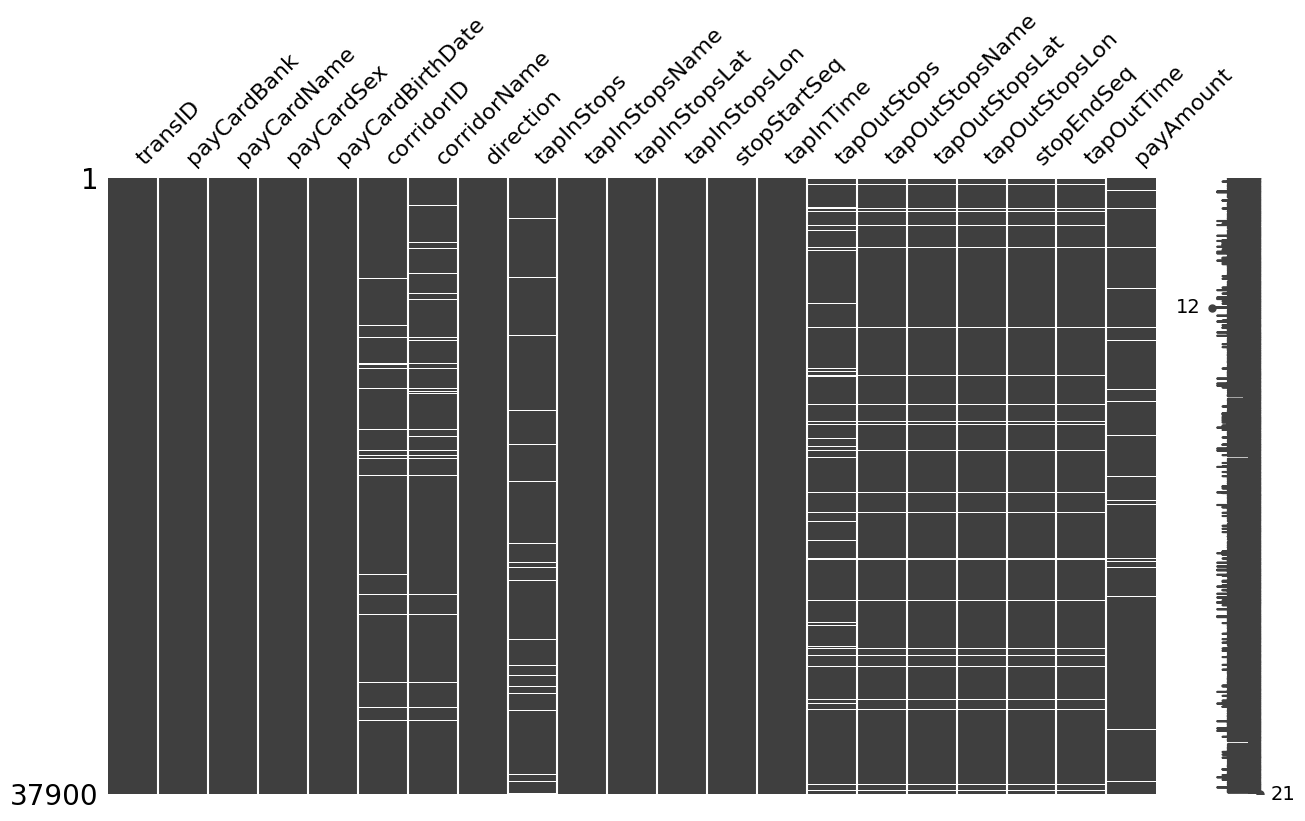

In [ ]:
msn.matrix(df,figsize=(15,8))

Dari analysis data missing value diatas dapat disimpulkan bahwa:
* *missing value* di kolom `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq` dan `tapOutTime` memiliki proporsi sebesar (>3%).
* *missing value* di kolom `corridorID` dan `corridorName`, `tapOutStops` serta `tapOutStopsName` memiliki sebaran yang terlihat berkaitan, jika data di `corridorID` kosong, maka kemungkinan besar data di `corridorName` juga kosong.
* pada beberapa nilai yang kosong atau NaN jangan langsung dilakukan penghapusan secara bersih, dari data Transjakarta dikarenakan pada baris yang lain datanya masih digunakan jadi tidak perlu dibersihkan semua, agar data yang lain masih bisa dipakai untuk analysis.

Menangani *missing value*
* Melakukan penghapusan semua data menggunakan fungsi dropna tapi tidak disarankan karena jika data *missing value* nya ada banyak maka terlalu banyak baris yang hilang dikarenakan penghapusan data tersebut.
* Mengisi data yang hilang, dengan cara mengisi data yang hilang menggunakan mean, median, ataupun modus dari kolom yang memiliki nilai *missing value* tersebut selain itu mengisi data dengan nilai yang tidak berpengaruh pada saat dilakukan analysis data.

Dengan metode groupby + transform + ffill + bfill, nilai yang hilang dalam corridorID dan corridorName bisa diisi berdasarkan informasi dari kelompok data yang sama

Jumlah Missing Value sebelum di cleaning:
corridorID      1257
corridorName    1930
dtype: int64

Jumlah Missing Value setelah di cleaning:
corridorID      1257
corridorName    1257
dtype: int64


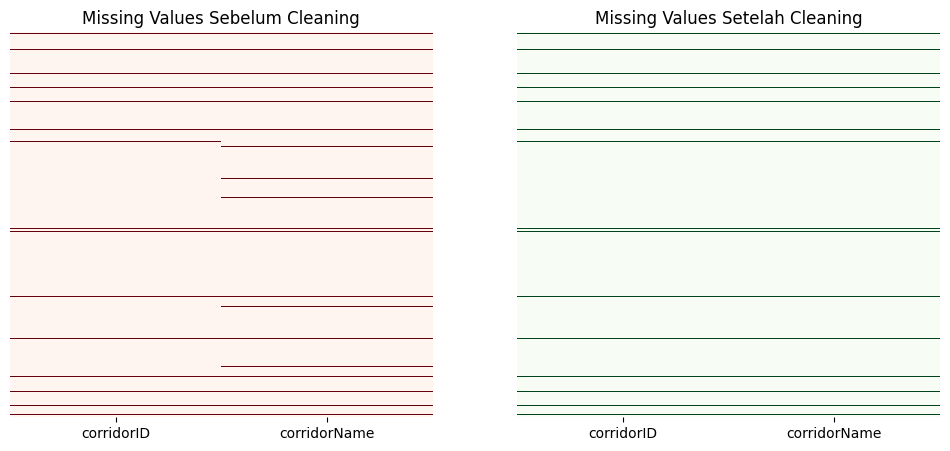

In [ ]:
clean_data = df.copy()

columns_check = ["corridorID", "corridorName"]

# Mengisi missing value dengan forward fill (ffill) dan backward fill (bfill)
clean_data["corridorName"] = clean_data.groupby("corridorID")["corridorName"].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
clean_data["corridorID"] = clean_data.groupby("corridorName")["corridorID"].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Menghitung jumlah missing values sebelum dan sesudah cleaning
missing_value_before = df[columns_check].isnull().sum()
missing_value_after = clean_data[columns_check].isnull().sum()

# Menampilkan hasil
print("Jumlah Missing Value sebelum di cleaning:")
print(missing_value_before)

print("\nJumlah Missing Value setelah di cleaning:")
print(missing_value_after)

# Membuat subplots untuk visualisasi missing values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap sebelum cleaning
sns.heatmap(df[columns_check].isnull(), cmap="Reds", cbar=False, yticklabels=False, ax=axes[0])
axes[0].set_title("Missing Values Sebelum Cleaning")

# Heatmap setelah cleaning
sns.heatmap(clean_data[columns_check].isnull(), cmap="Greens", cbar=False, yticklabels=False, ax=axes[1])
axes[1].set_title("Missing Values Setelah Cleaning")

# Menampilkan plot
plt.show()


Dengan metode groupby + transform + ffill + bfill, nilai yang hilang dalam tapInStops dan tapInStopsName bisa diisi berdasarkan informasi dari kelompok data yang sama

Jumlah Missing Value sebelum di cleaning:
tapInStops        1213
tapInStopsName       0
dtype: int64

Jumlah Missing Value setelah di cleaning:
tapInStops        0
tapInStopsName    0
dtype: int64


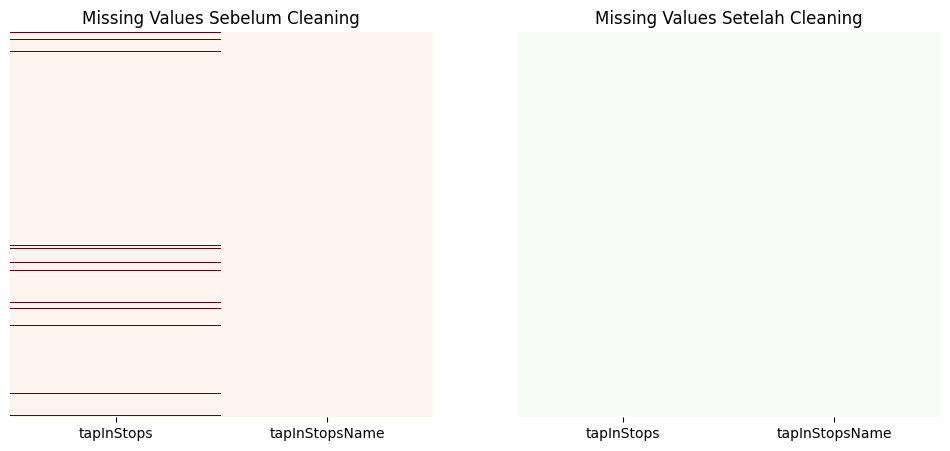

In [ ]:
columns_check = ["tapInStops", "tapInStopsName"]

# Mengisi missing value dengan forward fill (ffill) dan backward fill (bfill)
clean_data["tapInStops"] = clean_data.groupby("tapInStopsName")["tapInStopsName"].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Menghitung jumlah missing values sebelum dan sesudah cleaning
missing_value_before = df[columns_check].isnull().sum()
missing_value_after = clean_data[columns_check].isnull().sum()

# Menampilkan hasil
print("Jumlah Missing Value sebelum di cleaning:")
print(missing_value_before)

print("\nJumlah Missing Value setelah di cleaning:")
print(missing_value_after)

# Membuat subplots untuk visualisasi missing values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap sebelum cleaning
sns.heatmap(df[columns_check].isnull(), cmap="Reds", cbar=False, yticklabels=False, ax=axes[0])
axes[0].set_title("Missing Values Sebelum Cleaning")

# Heatmap setelah cleaning
sns.heatmap(clean_data[columns_check].isnull(), cmap="Greens", cbar=False, yticklabels=False, ax=axes[1])
axes[1].set_title("Missing Values Setelah Cleaning")

# Menampilkan plot
plt.show()


Dengan metode groupby + transform + ffill + bfill, nilai yang hilang dalam tapOutStops dan tapOutStopsName bisa diisi berdasarkan informasi dari kelompok data yang sama

Jumlah Missing Value sebelum di cleaning:
tapOutStops        2289
tapOutStopsName    1344
dtype: int64

Jumlah Missing Value setelah di cleaning:
tapOutStops        1363
tapOutStopsName    1363
dtype: int64


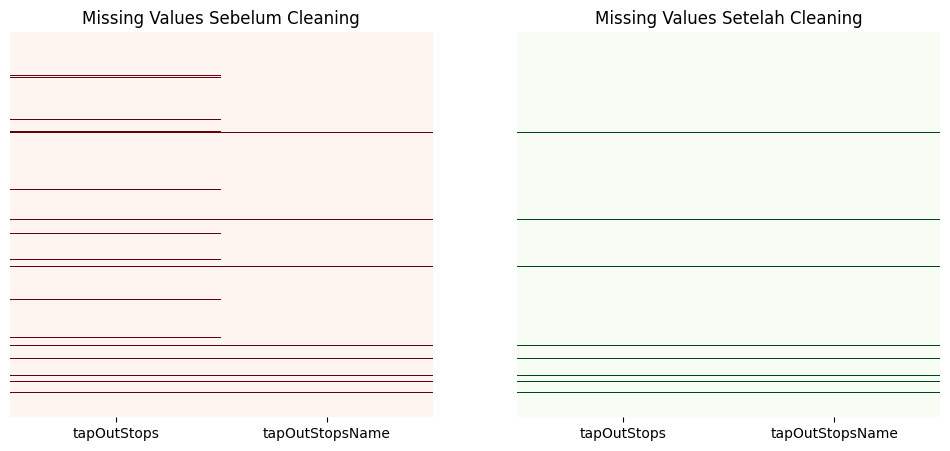

In [ ]:
columns_check = ["tapOutStops", "tapOutStopsName"]

# Mengisi missing value dengan forward fill (ffill) dan backward fill (bfill)
clean_data["tapOutStops"] = clean_data.groupby("tapOutStopsName")["tapOutStops"].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
clean_data["tapOutStopsName"] = clean_data.groupby("tapOutStops")["tapOutStopsName"].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Menghitung jumlah missing values sebelum dan sesudah cleaning
missing_value_before = df[columns_check].isnull().sum()
missing_value_after = clean_data[columns_check].isnull().sum()

# Menampilkan hasil
print("Jumlah Missing Value sebelum di cleaning:")
print(missing_value_before)

print("\nJumlah Missing Value setelah di cleaning:")
print(missing_value_after)

# Membuat subplots untuk visualisasi missing values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap sebelum cleaning
sns.heatmap(df[columns_check].isnull(), cmap="Reds", cbar=False, yticklabels=False, ax=axes[0])
axes[0].set_title("Missing Values Sebelum Cleaning")

# Heatmap setelah cleaning
sns.heatmap(clean_data[columns_check].isnull(), cmap="Greens", cbar=False, yticklabels=False, ax=axes[1])
axes[1].set_title("Missing Values Setelah Cleaning")

# Menampilkan plot
plt.show()


Mengubah data NaN menjadi nilai 0 agar pada saat data dicari nilai median mean tidak mempengaruhi nilai.


In [ ]:
clean_data.loc[pd.isna(clean_data['payAmount']), 'payAmount'] = 0

Mengembalikkan nama data ke DF

In [ ]:
df = clean_data.copy()

Melihat kembali nilai missing value setelah dibersihkan

In [ ]:
df.isna().sum()/df.shape[0]*100

,0
transID,0.000000
payCardBank,0.000000
payCardName,0.000000
payCardSex,0.000000
payCardBirthDate,0.000000
corridorID,3.316623
corridorName,3.316623
direction,0.000000
tapInStops,0.000000
tapInStopsName,0.000000


Menganalisa kembali:
* Jumlah baris dan kolom
* Type data
* Nilai Missing Value
* Uniq Value

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(37900, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,37900,"[FQDU127N9I87HX, BHCD492Y7U53PF]"
1,payCardBank,object,0,6,"[bni, online]"
2,payCardName,object,0,1993,"[Warta Siregar, Sutan Kemal Purnawati]"
3,payCardSex,object,0,2,"[F, M]"
4,payCardBirthDate,int64,0,67,"[1970, 1953]"
5,corridorID,object,1257,221,"[JAK.50, JAK.27]"
6,corridorName,object,1257,216,"[Tanjung Priok - Sukapura, Kalideres - Puri Kembangan]"
7,direction,float64,0,2,"[1.0, 0.0]"
8,tapInStops,object,0,2602,"[UPT. LLHD 2, Garuda Taman Mini]"
9,tapInStopsName,object,0,2602,"[Jln. Jatinegara Timur IV, Simpang Gg. Macan Daan Mogot]"


## DATA OUTLIER
Data outlier adalah data yang memiliki nilai ekstrem atau menyimpang secara signifikan dari sebagian besar data lainnya dalam suatu dataset. Outlier bisa terjadi karena kesalahan pengukuran, kesalahan input, atau memang fenomena alami yang harus dianalisis lebih lanjut.

Melihat data Outlier dari kolom ["PayCardBirthDate"] menggunakan fungsi SUBPLOT dan BOXPLOT agar bisa menampilkan apakah ada data yang memiliki nilai yang menyimpang pada kolom tersebut.

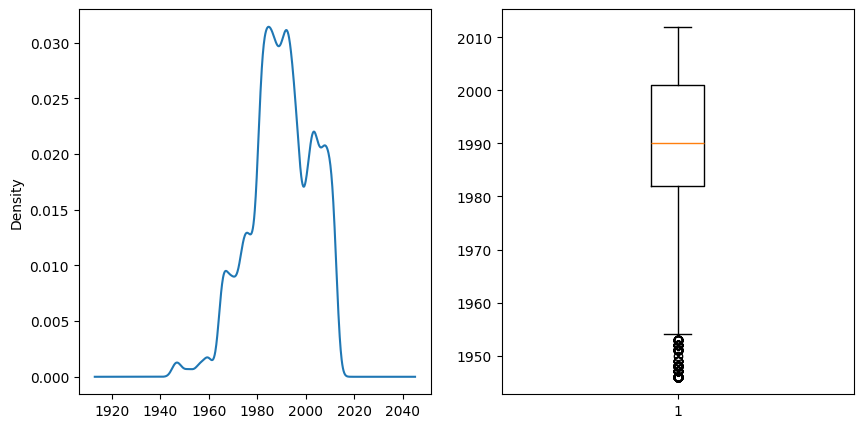

In [ ]:
f = plt.figure(figsize=(10,5))
f.add_subplot(1,2,1)
df["payCardBirthDate"].plot(kind="kde")
f.add_subplot(1,2,2)
plt.boxplot(df["payCardBirthDate"])
plt.show(block=True)

Menganaliysis data yang bersifat int64  dan float yang digunakan untuk membuat visualisasi data heatmap

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print(numeric_df.dtypes)

payCardBirthDate      int64
direction           float64
tapInStopsLat       float64
tapInStopsLon       float64
stopStartSeq          int64
tapOutStopsLat      float64
tapOutStopsLon      float64
stopEndSeq          float64
payAmount           float64
dtype: object


heatmap berfungsi untuk melihat korelasi di setiap kolom yang ada pada data sheet Transjakarta.

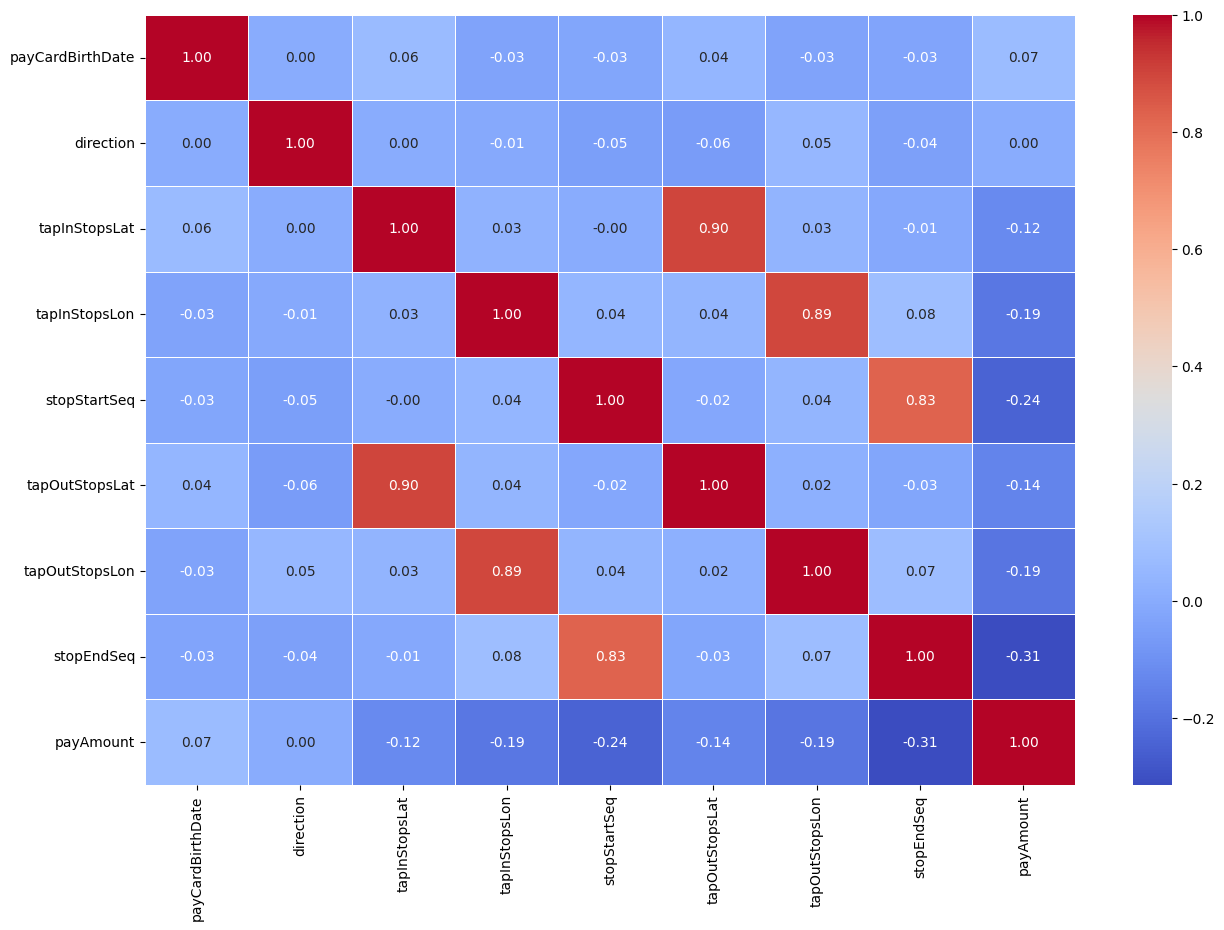

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

Setelah mmenganalisa dari data diatas maka didapatkan :
* Data ["TapOutStopsLat"], ["TapInStopsLat"] lalu ["TapOutStopsLon"], ["TapInStopsLon"] serta  ["stopStartSeq"], ["stopEndSeq"] memiliki korelasi yang cukup besar.
* setelah menganalisis pada kolom ["PayCardBirthDate"] tidak ada data outlier atau data yang menyimpang terlalu jauh

Menampilkan pengguna Transjakarta terbanyak berdasarkan umur kelahiran pengguna

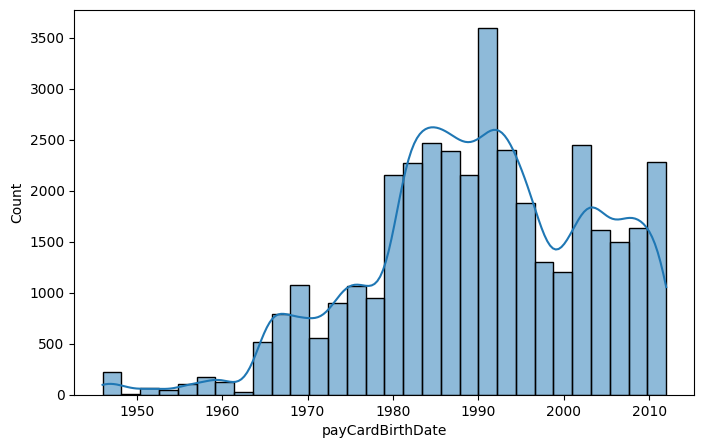

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['payCardBirthDate'],
bins=30, kde=True)
plt.show()

pada kolom ["PayCardBirthDate"] dapat disimpulkan bahwa pengguna Transjakarta paling banyak biasanya lahir pada tahun (1980 - 2000)

Menampilkan pengguna Transjakarta pada perempuan dan lelaki untuk mengetahui lebih dominan pengguna Transjakarta.

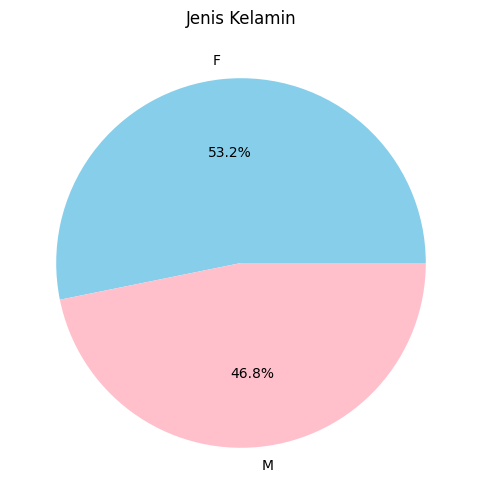

In [ ]:
plt.figure(figsize=(6, 6))
df['payCardSex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.ylabel('')  # Menghilangkan label y
plt.title('Jenis Kelamin')
plt.show()

dapat disimpulkan bahwa pengguna Transjakarta didominasi oleh perempuan sebesar 53.2% sedangkan laki-laki sebesar 46.8%

## MENGUBAH KE DATE TIME

Mengubah type data dari kolom ['tapInTime'] dan ['tapOutTime'] ke type data datetime agar memudahkan dalam menganaliysis.

In [ ]:
df.loc[:, 'tapInTime'] = pd.to_datetime(df['tapInTime'])
df["tapOutTime"] = pd.to_datetime(df["tapOutTime"])

Menampilkan halte teramai Transjakarta.

In [ ]:
df['corridorName'].value_counts()

,count
corridorName,
Cibubur - Balai Kota,400
Ciputat - CSW,388
Pulo Gadung - Monas,345
Harmoni - Jakarta International Stadium,341
Kebayoran Lama - Tanah Abang,339
...,...
Gondangdia - Balai Kota,41
Senen - Tanah Abang,41
Term. Pulo Gadung - Lampiri,31


Menampilkan 10 Rute perjalanan paling tersibuk dari data diatas dapat disimpulkan bahwa rute Cibubur - Balaikota merupakan rute yang paling ramai diminati penumpang

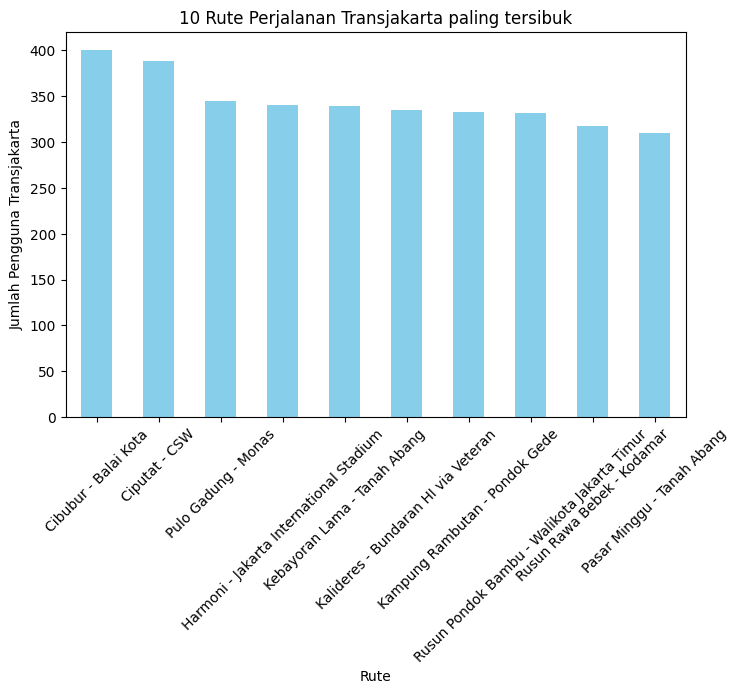

In [ ]:
top_stops = df['corridorName'].value_counts().head(10)

# Plot bar chart
top_stops.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('10 Rute Perjalanan Transjakarta paling tersibuk')
plt.xlabel('Rute')
plt.ylabel('Jumlah Pengguna Transjakarta')
plt.xticks(rotation=45)
plt.show()

Menampilkan Distribusi jumlah pengguna Transjakarta berdasarkan Jam

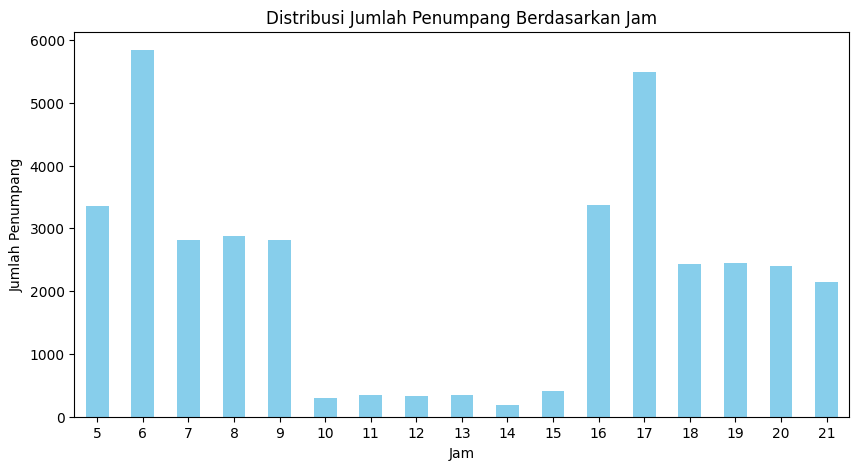

In [ ]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')

# Mengambil hanya jamnya
df['tapInHour'] = df['tapInTime'].dt.hour

# Hitung jumlah transaksi per jam
hourly_counts = df['tapInHour'].value_counts().sort_index()

# Plot grafik
plt.figure(figsize=(10,5))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Jumlah Penumpang Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=0)
plt.show()

dari visualisasi data diatas dapat disimpulkan bahwa pada saat jam 06.00 merupakan jam tersibuk.

Menampilkan halte teramai berdasar jumlah tapin pengguna transjakarta

In [ ]:
df['tapInStopsName'].value_counts()

,count
tapInStopsName,
Penjaringan,243
Garuda Taman Mini,208
BKN,173
BNN LRT,155
Pejaten,152
...,...
Ps. Bintang Mas 1,1
Jln. Madrasah Al Husna,1
Gg. Harapan I Jagakarsa,1


Tampilan visualisasi data dari 10 Jumlah terbanyak tapIn berdasarkan halte.

In [ ]:

# Hitung jumlah tap-in per halte
tapin_counts = df.groupby(['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']).size().reset_index(name='tapInCount')

# Ambil 10 halte dengan jumlah tap-in terbanyak
df_subset = tapin_counts.nlargest(10, 'tapInCount')

# Buat peta dengan titik tengah dari data yang diambil
m = folium.Map(location=[df_subset['tapInStopsLat'].mean(), df_subset['tapInStopsLon'].mean()], zoom_start=12)

# Tambahkan marker untuk setiap halte
for _, row in df_subset.iterrows():
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        popup=f"Halte: {row['tapInStopsName']}<br>Tap-in: {row['tapInCount']}",
        tooltip=row['tapInStopsName']
    ).add_to(m)

# Tampilkan peta
m


Tampilan visualisasi data dari 10 Jumlah terbanyak tapOut berdasarkan halte.

In [ ]:

# Hitung jumlah tap-in per halte
tapout_counts = df.groupby(['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']).size().reset_index(name='tapOutCount')

# Ambil 10 halte dengan jumlah tap-in terbanyak
df_subset = tapout_counts.nlargest(10, 'tapOutCount')

# Buat peta dengan titik tengah dari data yang diambil
m = folium.Map(location=[df_subset['tapOutStopsLat'].mean(), df_subset['tapOutStopsLon'].mean()], zoom_start=12)

# Tambahkan marker untuk setiap halte
for _, row in df_subset.iterrows():
    folium.Marker(
        location=[row['tapOutStopsLat'], row['tapOutStopsLon']],
        popup=f"Halte: {row['tapOutStopsName']}<br>Tap-Out: {row['tapOutCount']}",
        tooltip=row['tapOutStopsName']
    ).add_to(m)

# Tampilkan peta
m


In [ ]:
df["tapOutStopsName"].value_counts()

,count
tapOutStopsName,
BKN,316
Penjaringan,265
Term. Senen,196
Monas,167
Term. Kampung Rambutan,164
...,...
Klinik Darsa Medika Kamal,1
Gg. Rukun Lingkar Timur,1
Tanah Abang Blok B,1


dari visualisasi dan data yang dapat kita lihat bisa disimpulkan bahwa halte penjaringan merupakan halte teramai berdasarkan tapOut.

Membuat sistem paket langganan berdasar TapIn jika dalam sebulan melakukan TapIn > 20 maka direkomen ke paket bulanan jika lebih dari 6> maka masuk paket mingguan sedangkan lebih dari 0 maka masuk ke paket harian

In [ ]:
# Hitung jumlah tap-in per pengguna
tapin_counts = df.groupby('payCardName').size().rename('tapInCount')

# Tambahkan kategori berdasarkan jumlah tap-in
def categorize_tapin(count):
    if count > 20:
        return "Bulanan"
    elif count > 6:
        return "Mingguan"
    elif count > 0:
        return "Harian"
    else:
        return "NaN"

# Terapkan kategori ke df
df['Category'] = df['payCardName'].map(tapin_counts.apply(categorize_tapin))

Membuat sistem paket langganan berdasar TapIn jika dalam sebulan melakukan TapIn > 20 maka direkomen ke paket bulanan jika lebih dari 6> maka masuk paket mingguan sedangkan lebih dari 0 maka masuk ke paket harian

In [ ]:
df['Category'].value_counts()

,count
Category,
Bulanan,32013
Harian,3083
Mingguan,2804


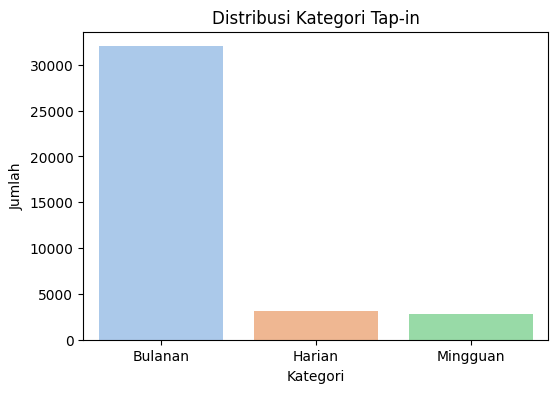

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts().values, palette="pastel")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.title("Distribusi Kategori Tap-in")
plt.show()

Dapat dilihat dari data diatas bahwa dalam bulan april rata rata para pelanggan melakukan tapIn lebih dari 20x maka dengan data ini lebih baik dibuat paket langganan agar para pengguna transjakarta lebih mudah pada saat melakukan pembayaran karena tinggal membeli perjalanan untuk paket bulanan, mingguan maupun harian

In [ ]:
df.to_csv("Transjakarta_Alviyan.xlsx", index=False)

Mengkonvert data yang sudah diproses ke Excel.